# Calibration of Arduino Controlled Peristaltic Pump

In [1]:
%config IPCompleter.greedy=True
#%matplotlib inline 
%matplotlib notebook
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import scipy.optimize as op

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


Define the fitting functions, and include estimates of the y error in the fitting

In [95]:
def linear(x, a, b):
    '''
    Linear function.
    linear(x; a, b) = a*x + b
    '''
    return a * x + b

def quadratic(x, a, b, c):
    return a * x**2 + b * x + c

def cubic(x, a, b, c, d):
    return a * x**3 + b * x**2 + c*x + d

def fit_data(x, y, y_err, f):
    popt, pconv = op.curve_fit(f, x, y, sigma=y_err, absolute_sigma=True)
    perr = np.sqrt(pconv.diagonal())
    print("Parameters:")
    
    fit_str = f"{ {popt[0], popt[1], popt[2], popt[3]} }"
    print(fit_str)

    print("Errors:    ", perr)
    return(popt, perr)

# Import calibration data for 5 experimental runs

Dial: value on control potentiometer

PWM - duty cycle in 0 - 255 for DC motor on pump


Values in Run 1 to Run 5 are in g/min

## Plot histograms of each flow rate

## Fit the data
- Take the mean and standard deviation of runs 2-5
- Then make a polynomial (cubic) fit of the mean value at each pwm setting

In [96]:
# 170, 255
# 180, 255

In [97]:
LL = 170
UL = 255
DL = UL - LL


(DL*80)/100 + LL

238.0

In [100]:
def fit_and_plot(df, f=cubic, LL =170, UL=255):
    
    DL = UL - LL
    if 'STD' in df.keys():
        mass_err = df['STD']
    else:
        mass_err = None
    pwm = (DL*df['Duty Cycle'])/100 + LL
    mass = df['Flow']
    
    fit_res, fit_err = fit_data(pwm, mass, mass_err, f)
    pwm_fit = np.linspace(LL,UL)
    mass_fit = np.polyval(fit_res, pwm_fit)

    fig, ax = plt.subplots()
    plt.errorbar(pwm, mass, fmt='.b', label='Data', yerr=mass_err)
    plt.plot(pwm_fit, mass_fit, '-r', label='Fit')
    plt.xlabel(r'PWM')
    plt.ylabel(r'$Q$ (g/min)')
    ax.legend(loc='best', shadow=False)
    # ax.set_aspect(3/4)
    plt.show()
    return fit_res


Parameters:
{-0.024274421734979824, 4.113316819477836e-05, 5.128510026454799, -338.44896571364825}
Errors:     [3.80197948e-06 2.43686437e-03 5.17681786e-01 3.64456869e+01]


<IPython.core.display.Javascript object>


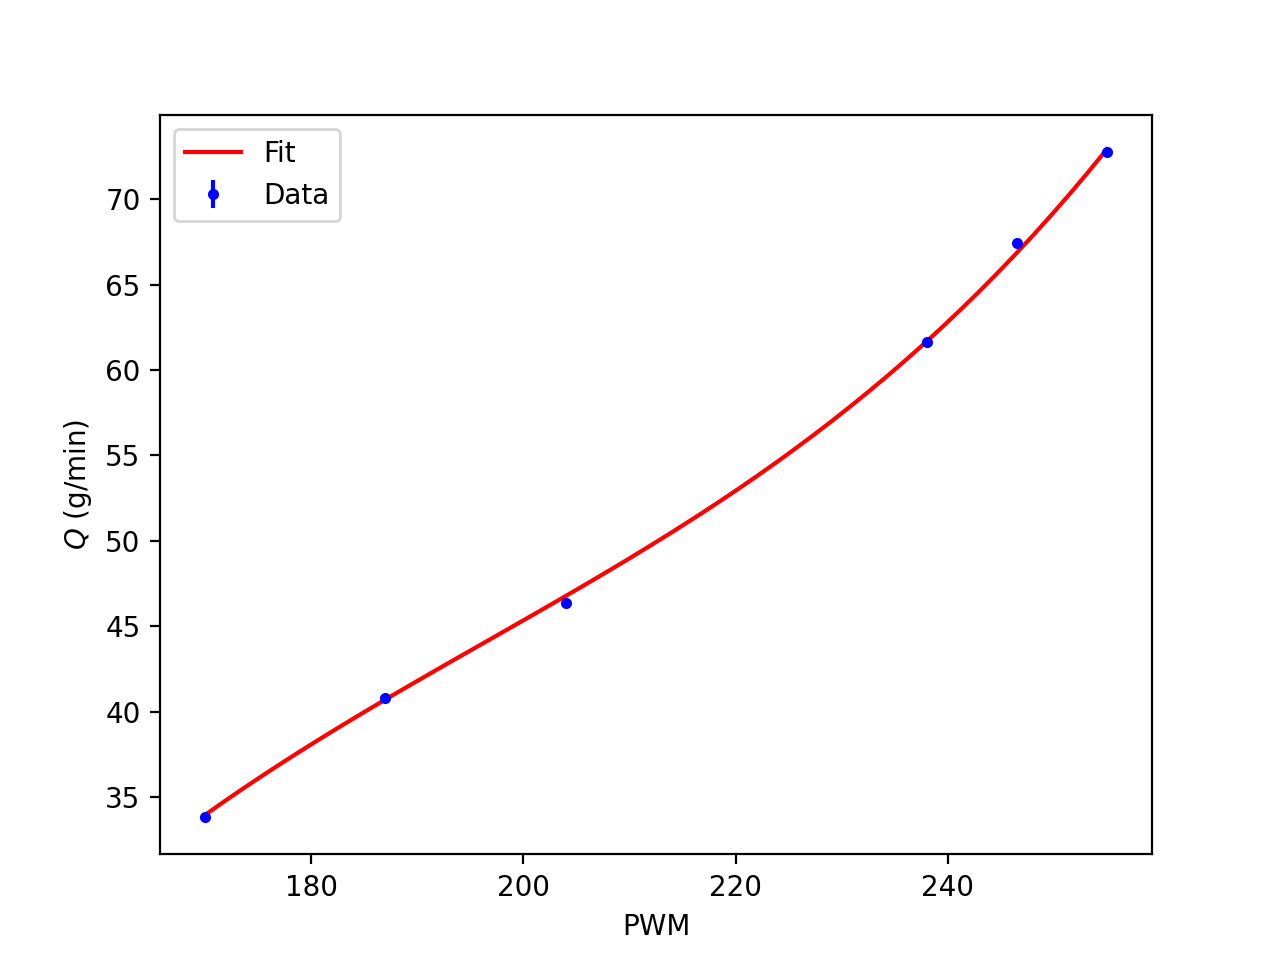

Parameters:
{0.012013399291829218, -1.7229073913757067e-05, -2.5408949518185744, 176.7413577055134}
Errors:     [3.68074840e-05 2.40278974e-02 5.19152632e+00 3.71190656e+02]


<IPython.core.display.Javascript object>


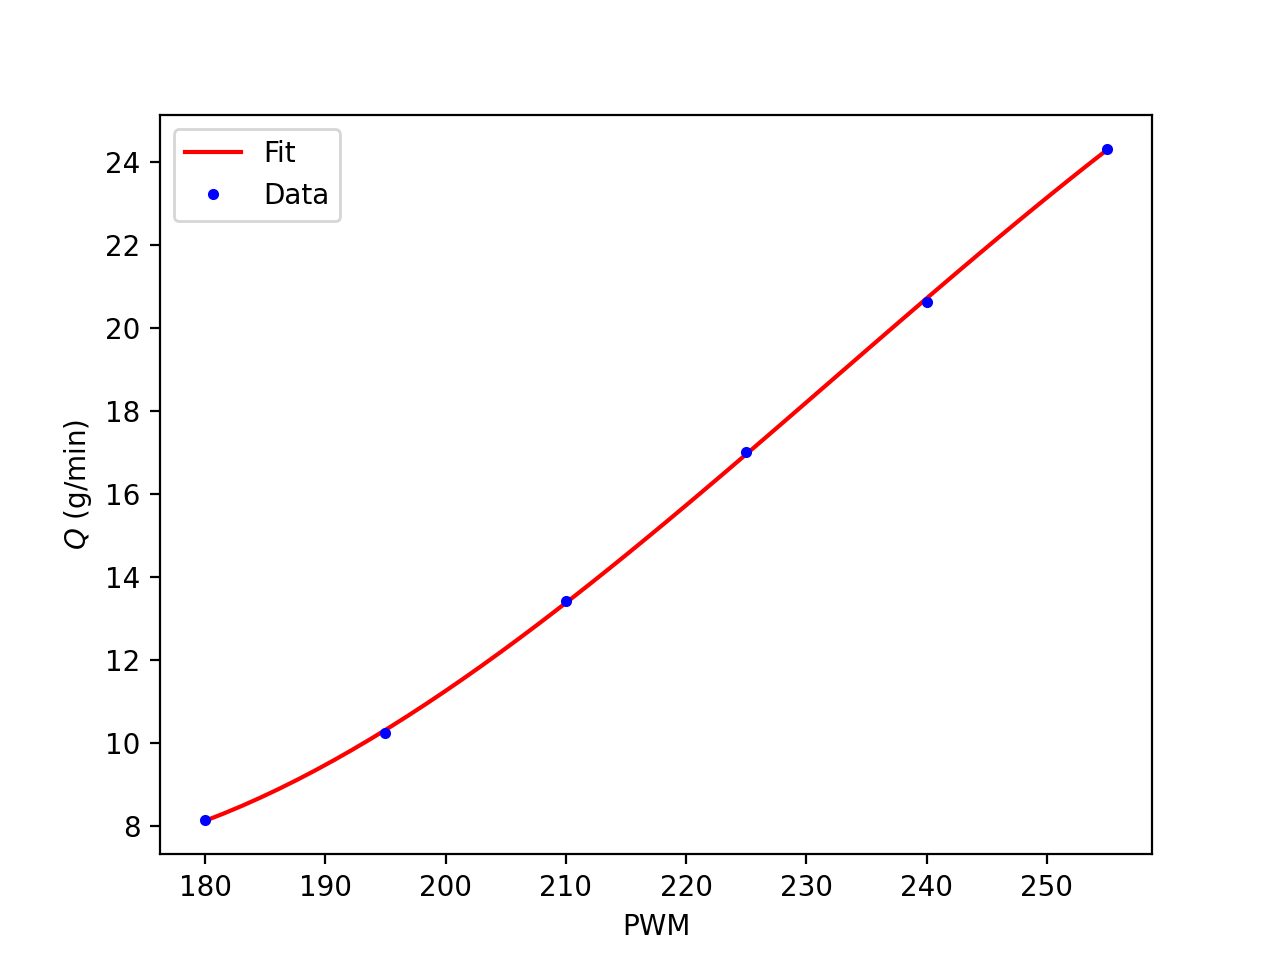

In [101]:
df = pd.read_csv (r'pumpA_forward.csv')
LL = 170
UL = 255

fitA = fit_and_plot(df, f=cubic, LL = LL, UL = UL)


df = pd.read_csv (r'pumpB_forward.csv')
LL = 180
UL = 255

fitB = fit_and_plot(df, f=cubic, LL = LL, UL = UL)

In [102]:
fitA

array([ 4.11331682e-05, -2.42744217e-02,  5.12851003e+00, -3.38448966e+02])

In [103]:
fitB

array([-1.72290739e-05,  1.20133993e-02, -2.54089495e+00,  1.76741358e+02])